In [1]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly.express as px

In [2]:
#Cargar datos a un dataframe
df=pd.read_csv('./data/USAHousingDataset.csv')
#Cantidad de observaciones y variables del dataset
df.shape

(4140, 18)

In [3]:
#Tipo de datos del dataset
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [4]:
#Vista de las primeras observaciones del dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [5]:
#Estadísticas descriptivas de las variables numéricas
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [6]:
#Estadística descriptiva de las variables categóricas
df.describe(include='object')

,date,street,city,statezip,country
count,4140,4140,4140,4140,4140
unique,68,4079,43,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1415,128,4140


In [7]:
#Cantidad de datos vacíos del dataset
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
#Porcentaje de observaciones por ciudad
df['city'].value_counts(normalize=True)

city
Seattle               0.341787
Renton                0.063043
Bellevue              0.062802
Redmond               0.050483
Kent                  0.040338
Kirkland              0.040097
Issaquah              0.039130
Auburn                0.039130
Sammamish             0.038164
Federal Way           0.031643
Shoreline             0.027053
Woodinville           0.024879
Maple Valley          0.021739
Mercer Island         0.019565
Snoqualmie            0.015700
Burien                0.015459
Kenmore               0.014010
Des Moines            0.012560
North Bend            0.010870
Covington             0.009420
Duvall                0.009420
Lake Forest Park      0.007971
Newcastle             0.007488
Bothell               0.007246
SeaTac                0.007005
Enumclaw              0.006763
Tukwila               0.006763
Vashon                0.006763
Carnation             0.004348
Normandy Park         0.003865
Medina                0.002657
Clyde Hill            0.002415
Fal

In [9]:
#Convertir columna date a datetime para facilitar exploración
df['date'] = pd.to_datetime(df['date'])
#Se agrupan por mes para evaluar la fecha de las observaciones
df.groupby(df['date'].dt.to_period('M')).size()

date
2014-05    1308
2014-06    2179
2014-07     653
Freq: M, dtype: int64

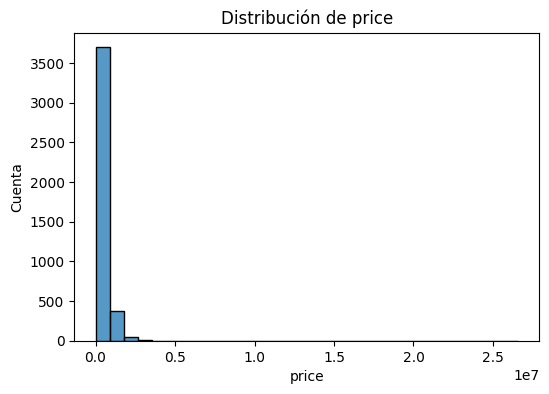

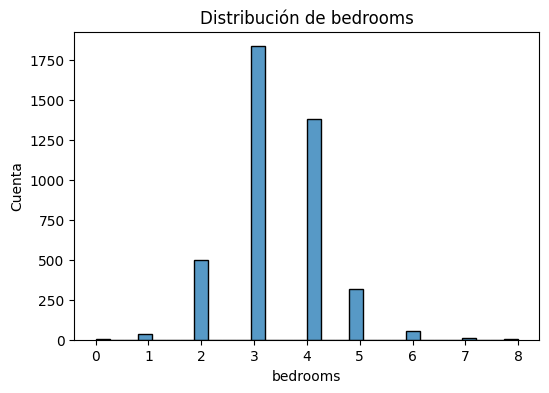

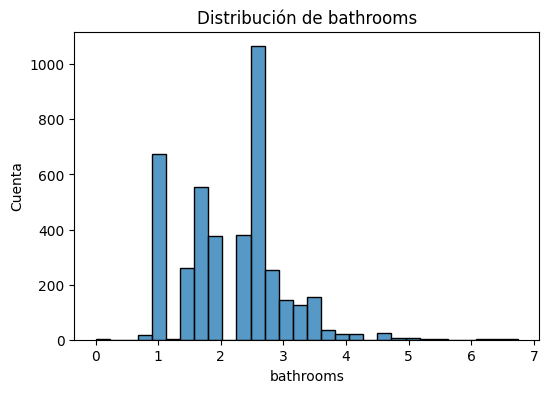

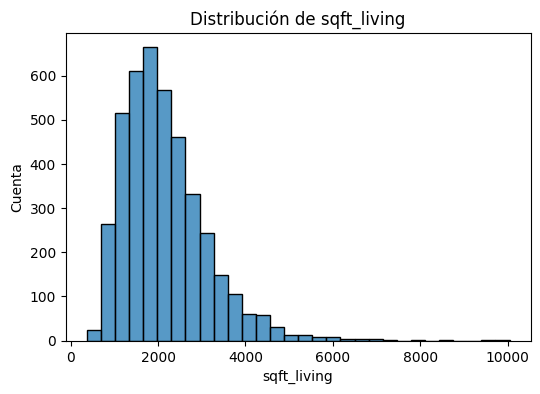

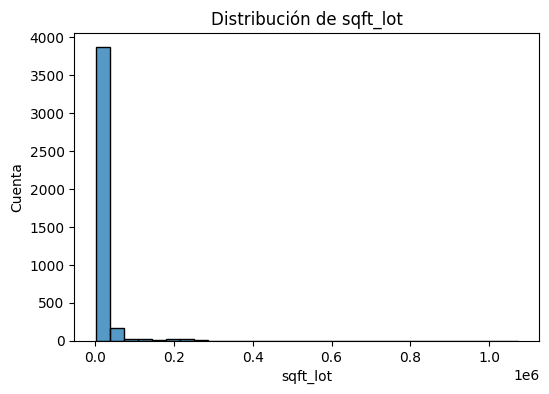

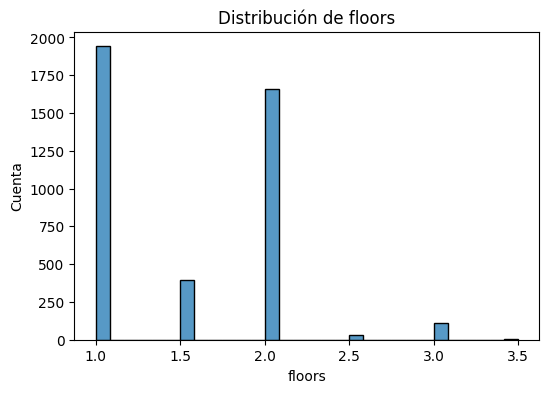

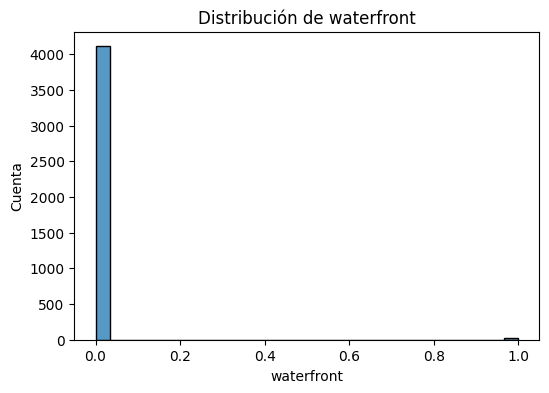

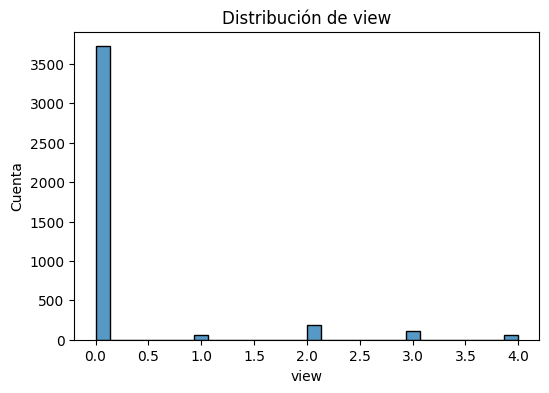

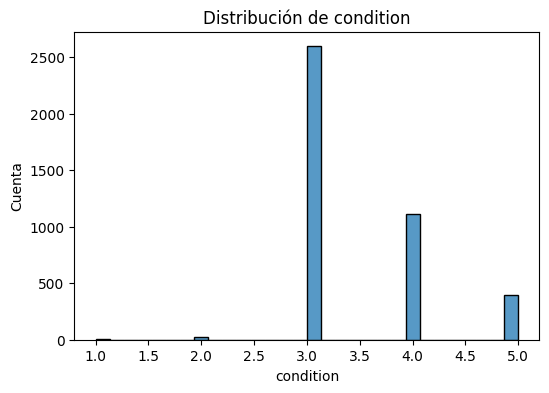

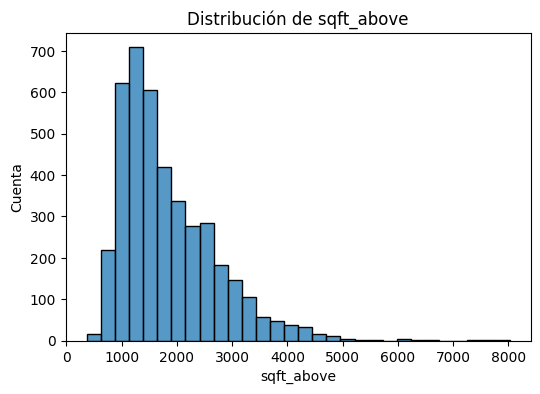

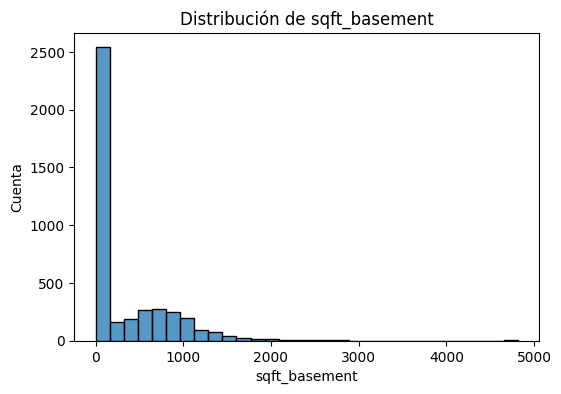

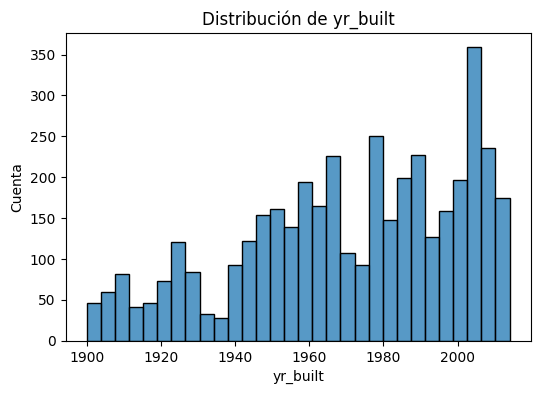

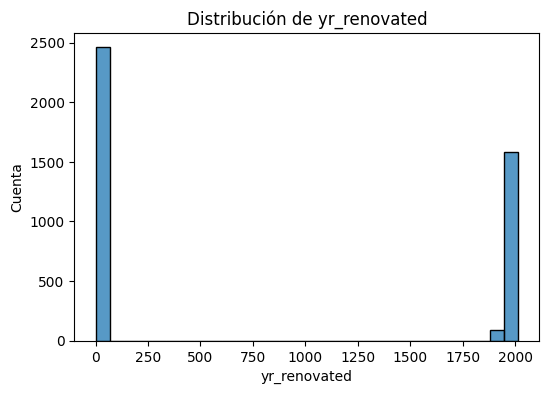

In [10]:
#Histogramas de los datos
numeric_cols = df.select_dtypes(include='number').columns

#Para cada columna numérica se grafica un histograma
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Cuenta")
    plt.show()

In [11]:
#Matriz de correlación
corr=df.corr(numeric_only=True)
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.188765,0.317785,0.418528,0.045964,0.143180,0.131401,0.217553,0.030327,0.355214,0.204066,0.027067,-0.028272
bedrooms,0.188765,1.000000,0.542549,0.590110,0.065747,0.178908,-0.001286,0.105512,0.016503,0.478124,0.329862,0.153514,-0.069439
bathrooms,0.317785,0.542549,1.000000,0.760353,0.097497,0.487462,0.080152,0.210590,-0.123024,0.687679,0.292170,0.470814,-0.221307
sqft_living,0.418528,0.590110,0.760353,1.000000,0.194226,0.345130,0.126157,0.308098,-0.069315,0.874881,0.439053,0.296545,-0.124646
sqft_lot,0.045964,0.065747,0.097497,0.194226,1.000000,-0.001113,0.019229,0.071264,0.012016,0.203190,0.023567,0.047224,-0.020308
floors,0.143180,0.178908,0.487462,0.345130,-0.001113,1.000000,0.021278,0.030604,-0.275212,0.524777,-0.261826,0.470139,-0.234445
waterfront,0.131401,-0.001286,0.080152,0.126157,0.019229,0.021278,1.000000,0.359237,0.004027,0.081076,0.109736,-0.031891,0.014030
view,0.217553,0.105512,0.210590,0.308098,0.071264,0.030604,0.359237,1.000000,0.064440,0.167270,0.325002,-0.067859,0.028837
condition,0.030327,0.016503,-0.123024,-0.069315,0.012016,-0.275212,0.004027,0.064440,1.000000,-0.183599,0.197656,-0.400394,-0.187971
sqft_above,0.355214,0.478124,0.687679,0.874881,0.203190,0.524777,0.081076,0.167270,-0.183599,1.000000,-0.051039,0.416525,-0.163368


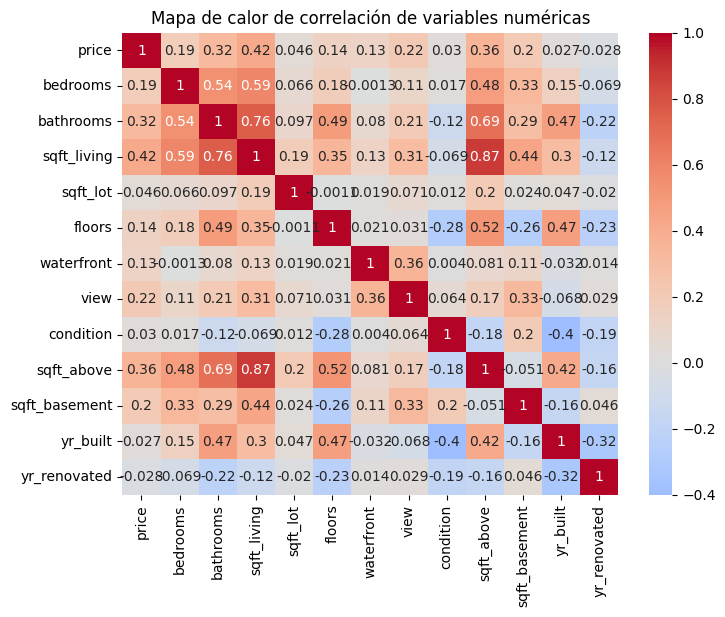

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de correlación de variables numéricas")
plt.show()

In [13]:
#Calcular el precio por sqft
df['price_per_sqft'] = df['price'] / df['sqft_lot']

# Agrupar promedio de precio por sqft por ciudad
precio_ciudad = df.groupby('city')['price_per_sqft'].mean().sort_values(ascending=False)
precio_ciudad

city
Seattle               153.080670
Issaquah              116.238364
Medina                101.508896
Yarrow Point           97.458222
Mercer Island          86.239520
Snoqualmie             79.359430
Bellevue               78.837116
Kirkland               78.262402
Beaux Arts Village     76.020408
Redmond                69.998415
Sammamish              68.903121
Newcastle              65.892227
Clyde Hill             61.438731
Bothell                60.077391
Kent                   53.690288
Kenmore                50.883899
Snoqualmie Pass        50.665895
Maple Valley           50.313523
Shoreline              49.588081
Renton                 48.716468
Covington              44.357965
Normandy Park          42.216105
Lake Forest Park       41.407580
Des Moines             35.782268
North Bend             35.444478
Duvall                 35.389759
Burien                 34.146018
Tukwila                32.344806
Woodinville            31.970379
Auburn                 31.782054
Feder

In [14]:
precio_ciudad = df.groupby('city')['price_per_sqft'].mean().reset_index()

# Inicializar geolocator
geolocator = Nominatim(user_agent="wa_price_map")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Se agrega el estado de Washington en USA a cada ciudad para facilitar el geocode
def safe_geocode(city):
    try:
        return geocode(f"{city}, Washington, USA")
    except:
        return None

#Encontrar las coordenadas geográficas de cada ciudad
precio_ciudad['location'] = precio_ciudad['city'].apply(safe_geocode)
precio_ciudad['lat'] = precio_ciudad['location'].apply(lambda loc: loc.latitude if loc else None)
precio_ciudad['lon'] = precio_ciudad['location'].apply(lambda loc: loc.longitude if loc else None)

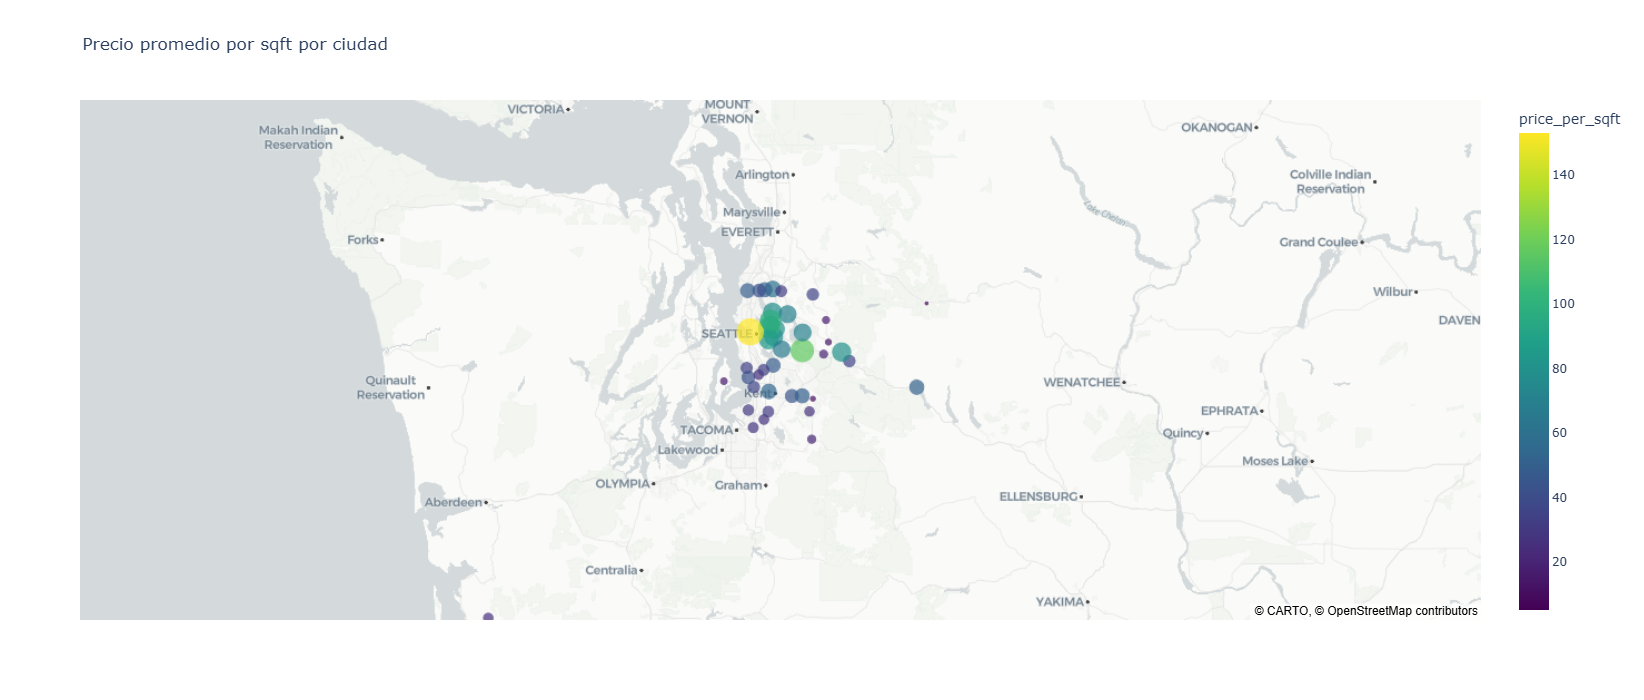

In [15]:
# Gráfica geográfica usando plotly express scatter_map
fig = px.scatter_map(
    precio_ciudad,
    lat='lat',
    lon='lon',
    size='price_per_sqft',
    color='price_per_sqft',
    hover_name='city',
    color_continuous_scale='Viridis',
    map_style='carto-positron',
    zoom=7,
    title='Precio promedio por sqft por ciudad',
    width=700,
    height=700,
)
fig.show()